# **2. Data Cleaning**

## Objectives

* Clean the raw dataset imported from Kaggle

## Inputs

* Identify missing data, duplicated data, erroneously formatted data

## Outputs

* Create outputs/datasets/collection/HousePrices_clean
* Create outputs/datasets/collection/InheritedHouses_clean 


---

# Change working directory

* Change the working directory to ensure files copied and saved to correct locations.

In [1]:
import os

# Get the current directory
current_dir = os.getcwd()
print("Current Directory:", current_dir)

# Change the directory to the new path
os.chdir('/workspace/milestone-project-housing-issues')

# Get the updated current directory
current_dir = os.getcwd()
print("New Current Directory:", current_dir)

Current Directory: /workspace/milestone-project-housing-issues/jupyter_notebooks
New Current Directory: /workspace/milestone-project-housing-issues


### Loading Data and Raw Data Profile

In [2]:
# Load House Prices dataset
import pandas as pd
df_houseprices_for_cleaning = (pd.read_csv("outputs/datasets/collection/HousePrices.csv"))
df_houseprices_for_cleaning.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.0          61            5            7          856         0.0   
1         0.0           0            8            6         1262         NaN   
2       162.0          42            5            7          920         NaN   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  

[3 rows x 24 columns]

# Raw Data Exploration

In [3]:
# Raw data profile
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(df_houseprices_for_cleaning, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Variables with Zero-Values and Missing Data

## Overview of missing data and variables with non-valid zero-values

### Overview of Missing data

In [4]:
#Using EvaluateMissingData() function to display missing data
def EvaluateMissingData(df_houseprices_for_cleaning):
  missing_data_absolute = df_houseprices_for_cleaning.isnull().sum()
  missing_data_percentage = round(missing_data_absolute/len(df_houseprices_for_cleaning)*100, 2)
  df_missing_data = (pd.DataFrame(
              data={"RowsWithMissingData": missing_data_absolute,
                  "PercentageOfDataset": missing_data_percentage,
                  "DataType": df_houseprices_for_cleaning.dtypes}
                  )
             .sort_values(by=['PercentageOfDataset'], ascending=False)
             .query("PercentageOfDataset > 0")
             )

  return df_missing_data

EvaluateMissingData(df_houseprices_for_cleaning)


RowsWithMissingData  PercentageOfDataset DataType
EnclosedPorch                 1324                90.68  float64
WoodDeckSF                    1305                89.38  float64
LotFrontage                    259                17.74  float64
GarageFinish                   162                11.10   object
BsmtFinType1                   114                 7.81   object
BedroomAbvGr                    99                 6.78  float64
2ndFlrSF                        86                 5.89  float64
GarageYrBlt                     81                 5.55  float64
MasVnrArea                       8                 0.55  float64

In [5]:
# Dropping variables with more than 80% missing data -EnclosedPorch and WoodDeckSF

from feature_engine.selection import DropFeatures

variables_method = ['EnclosedPorch', 'WoodDeckSF']
imputer = DropFeatures(features_to_drop = variables_method)
imputer.fit(df_houseprices_for_cleaning)
df_houseprices_for_cleaning = imputer.transform(df_houseprices_for_cleaning)
df_houseprices_for_cleaning.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        150         548          RFn       2003.0  ...     8450        65.0   
1        284         460          RFn       1976.0  ...     9600        80.0   
2        434         608          RFn       2001.0  ...    11250        68.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0       196.0           61            5            7          856       2003   
1         0.0            0            8            6         1262       1976   
2       162.0           42            5            7          920       2001   

   YearRemodAdd  SalePrice  
0          2003     208500  
1          1976     181500  
2          2002     223500  

[3 rows x 22 columns]

### Overview of variables with zero-values

In [6]:
def EvaluateZeroValues(df_houseprices_for_cleaning):
    zero_data_absolute = (df_houseprices_for_cleaning == 0).sum()
    zero_data_percentage = round(zero_data_absolute / len(df_houseprices_for_cleaning) * 100, 2)
    df_zero_data = (pd.DataFrame(
                  data={"RowsWithZeroValues": zero_data_absolute,
                        "PercentageOfDataset": zero_data_percentage,
                        "DataType": df_houseprices_for_cleaning.dtypes}
                  )
                 .sort_values(by=['PercentageOfDataset'], ascending=False)
                 .query("PercentageOfDataset > 0")
                 )

    return df_zero_data

EvaluateZeroValues(df_houseprices_for_cleaning)

RowsWithZeroValues  PercentageOfDataset DataType
MasVnrArea                   861                58.97  float64
2ndFlrSF                     781                53.49  float64
OpenPorchSF                  656                44.93    int64
BsmtFinSF1                   467                31.99    int64
BsmtUnfSF                    118                 8.08    int64
GarageArea                    81                 5.55    int64
TotalBsmtSF                   37                 2.53    int64
BedroomAbvGr                   6                 0.41  float64

### Addressing zero values that affect dataset validity

In [7]:
# Creating binary variables to replace variables where zero indicates the absence of a feature (2nd floor, porch, basement, masonry veneer)
import numpy as np

df_houseprices_for_cleaning['Has2ndFloor'] = df_houseprices_for_cleaning['2ndFlrSF'].apply(lambda x: 1 if x >= 1 else 0)
df_houseprices_for_cleaning['HasMasVnr'] = df_houseprices_for_cleaning['MasVnrArea'].apply(lambda x: 1 if x >= 1 else 0)
df_houseprices_for_cleaning['HasOpenPorch'] = df_houseprices_for_cleaning['OpenPorchSF'].apply(lambda x: 1 if x >= 1 else 0)
df_houseprices_for_cleaning['HasGarage'] = df_houseprices_for_cleaning['GarageArea'].apply(lambda x: 1 if x >= 1 else 0)
df_houseprices_for_cleaning['HasFinBsmt'] = df_houseprices_for_cleaning.apply(lambda x: 1 if x['BsmtFinSF1'] > 0 else (0 if x['BsmtUnfSF'] > 0 else np.nan), axis=1)

In [8]:
# Dropping the original variables with large numbers of zero-values that have been replaced with binary variables

df_houseprices_for_cleaning.drop(['2ndFlrSF', 'MasVnrArea', 'OpenPorchSF', 'GarageArea', 'BsmtFinSF1', 'BsmtUnfSF'], axis=1, inplace=True)

*Addressing imbalance of values in YearRemodAdd*

In [9]:
# Examining YearRemodAdd variable for value distribution
value_counts = df_houseprices_for_cleaning['YearRemodAdd'].value_counts()
value_counts

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [10]:
# Create variable for whether modifications made to house
df_houseprices_for_cleaning['ModsMade'] = df_houseprices_for_cleaning.apply(lambda x: 1 if (x['YearRemodAdd'] > 0 and (x['YearRemodAdd'] - x['YearBuilt']) != 0) else 0, axis=1)
df_houseprices_for_cleaning[['YearBuilt', 'YearRemodAdd', 'ModsMade']].head()


YearBuilt  YearRemodAdd  ModsMade
0       2003          2003         0
1       1976          1976         0
2       2001          2002         1
3       1915          1970         1
4       2000          2000         0

In [11]:
# Dropping YearRemodAdd as data skewed towards 1950 (all pre-1950 values appear set to 1950)

df_houseprices_for_cleaning.drop(['YearRemodAdd'], axis=1, inplace=True)

### Addressing missing data

In [12]:
#Using EvaluateMissingData() function to display missing data
def EvaluateMissingData(df_houseprices_for_cleaning):
  missing_data_absolute = df_houseprices_for_cleaning.isnull().sum()
  missing_data_percentage = round(missing_data_absolute/len(df_houseprices_for_cleaning)*100, 2)
  df_missing_data = (pd.DataFrame(
              data={"RowsWithMissingData": missing_data_absolute,
                  "PercentageOfDataset": missing_data_percentage,
                  "DataType": df_houseprices_for_cleaning.dtypes}
                  )
             .sort_values(by=['PercentageOfDataset'], ascending=False)
             .query("PercentageOfDataset > 0")
             )

  return df_missing_data

EvaluateMissingData(df_houseprices_for_cleaning)

RowsWithMissingData  PercentageOfDataset DataType
LotFrontage                   259                17.74  float64
GarageFinish                  162                11.10   object
BsmtFinType1                  114                 7.81   object
BedroomAbvGr                   99                 6.78  float64
GarageYrBlt                    81                 5.55  float64
HasFinBsmt                     37                 2.53  float64

In [13]:
# Apply random sampling from the distribution for LotFrontage, BedroomAbvGr, BsmtFinType1

columns_to_impute = ['LotFrontage', 'BedroomAbvGr', 'BsmtFinType1']

# Apply random sampling from the distribution for each specified column
for col in columns_to_impute:
    df_houseprices_for_cleaning[col] = df_houseprices_for_cleaning[col].apply(
        lambda x: np.random.choice(df_houseprices_for_cleaning[col].dropna()) if pd.isnull(x) else x
    )

In [14]:
# Apply group-based mode imputation to GarageFinish with relationship to OverallCond
df_houseprices_for_cleaning['GarageFinish'] = df_houseprices_for_cleaning.groupby('OverallCond')['GarageFinish'].apply(lambda x: x.fillna(x.mode()[0]))


In [15]:
# Replace missing values for GarageYrBlt with value from YearBuilt
df_houseprices_for_cleaning['GarageYrBlt'].fillna(df_houseprices_for_cleaning['YearBuilt'], inplace=True)


In [16]:
# Apply random imputation based on probability distribution for binary variable 
import numpy as np

# Calculate probability of `1` in the binary variable
prob_1 = df_houseprices_for_cleaning['HasFinBsmt'].mean()

# Impute missing values randomly based on the probability distribution
df_houseprices_for_cleaning['HasFinBsmt'] = df_houseprices_for_cleaning['HasFinBsmt'].apply(
    lambda x: np.random.choice([0, 1], p=[1 - prob_1, prob_1]) if pd.isna(x) else x
)

In [17]:
missing_values_count = df_houseprices_for_cleaning.isna().sum()
missing_values_count

1stFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinType1    0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
SalePrice       0
Has2ndFloor     0
HasMasVnr       0
HasOpenPorch    0
HasGarage       0
HasFinBsmt      0
ModsMade        0
dtype: int64

In [18]:
df_houseprices_for_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   BedroomAbvGr  1460 non-null   float64
 2   BsmtExposure  1460 non-null   object 
 3   BsmtFinType1  1460 non-null   object 
 4   GarageFinish  1460 non-null   object 
 5   GarageYrBlt   1460 non-null   float64
 6   GrLivArea     1460 non-null   int64  
 7   KitchenQual   1460 non-null   object 
 8   LotArea       1460 non-null   int64  
 9   LotFrontage   1460 non-null   float64
 10  OverallCond   1460 non-null   int64  
 11  OverallQual   1460 non-null   int64  
 12  TotalBsmtSF   1460 non-null   int64  
 13  YearBuilt     1460 non-null   int64  
 14  SalePrice     1460 non-null   int64  
 15  Has2ndFloor   1460 non-null   int64  
 16  HasMasVnr     1460 non-null   int64  
 17  HasOpenPorch  1460 non-null   int64  
 18  HasGarage     1460 non-null 

In [19]:
# Recoding float64 variables to integers

float_columns = df_houseprices_for_cleaning.select_dtypes(include='float64').columns
df_houseprices_for_cleaning[float_columns] = df_houseprices_for_cleaning[float_columns].astype(int)

df_houseprices_for_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   1stFlrSF      1460 non-null   int64 
 1   BedroomAbvGr  1460 non-null   int64 
 2   BsmtExposure  1460 non-null   object
 3   BsmtFinType1  1460 non-null   object
 4   GarageFinish  1460 non-null   object
 5   GarageYrBlt   1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   KitchenQual   1460 non-null   object
 8   LotArea       1460 non-null   int64 
 9   LotFrontage   1460 non-null   int64 
 10  OverallCond   1460 non-null   int64 
 11  OverallQual   1460 non-null   int64 
 12  TotalBsmtSF   1460 non-null   int64 
 13  YearBuilt     1460 non-null   int64 
 14  SalePrice     1460 non-null   int64 
 15  Has2ndFloor   1460 non-null   int64 
 16  HasMasVnr     1460 non-null   int64 
 17  HasOpenPorch  1460 non-null   int64 
 18  HasGarage     1460 non-null   int64 
 19  HasFin

### Exploring impact of removing missing data

In [21]:
# Loading original dataset for comparison with cleaned dataset
import pandas as pd
df_houseprices = (pd.read_csv("outputs/datasets/collection/HousePrices.csv"))
df_houseprices.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.0          61            5            7          856         0.0   
1         0.0           0            8            6         1262         NaN   
2       162.0          42            5            7          920         NaN   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  

[3 rows x 24 columns]

In [22]:
#Using DataCleaningEffect() function to examine impact of missing data on variables and dataset
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

df_houseprices_original = df_houseprices.copy()
df_houseprices_cleaned = df_houseprices_for_cleaning.copy()

def DataCleaningEffect(df_houseprices_original,df_houseprices_for_cleaninged,variables_applied_with_method):

  flag_count=1 # Indicate plot number
  
  # distinguish between numerical and categorical variables
  categorical_variables = df_houseprices_original.select_dtypes(exclude=['number']).columns

  # scan over variables, 
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if categorical plot a barplot
  for set_of_variables in [variables_applied_with_method]:
    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{set_of_variables} \n\n")
  

    for var in set_of_variables:
      if var in categorical_variables:  # it is categorical variable: barplot
        
        df1 = pd.DataFrame({"Type":"Original","Value":df_houseprices_original[var]})
        df2 = pd.DataFrame({"Type":"Cleaned","Value":df_houseprices_cleaned[var]})
        dfAux = pd.concat([df1, df2], axis=0)
        fig , axes = plt.subplots(figsize=(15, 5))
        sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#432371',"#FAAE7B"])
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.xticks(rotation=90)
        plt.legend() 

      else: # it is numerical variable: histogram

        fig , axes = plt.subplots(figsize=(10, 5))
        sns.histplot(data=df_houseprices_original, x=var, color="#432371", label='Original', kde=True,element="step", ax=axes)
        sns.histplot(data=df_houseprices_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True,element="step", ax=axes)
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.legend() 

      plt.show()
      flag_count+= 1



* Distribution Effect Analysis After Data Cleaning Method in the following variables:
      LotFrontage  BedroomAbvGr BsmtFinType1 GarageFinish  GarageYrBlt
0              65             3          GLQ          RFn         2003
1              80             3          ALQ          RFn         1976
2              68             3          GLQ          RFn         2001
3              60             3          ALQ          Unf         1998
4              84             4          GLQ          RFn         2000
...           ...           ...          ...          ...          ...
1455           62             3          Unf          RFn         1999
1456           85             2          ALQ          Unf         1978
1457           66             4          GLQ          RFn         1941
1458           68             2          ALQ          Unf         1950
1459           75             3          BLQ          Fin         1965

[1460 rows x 5 columns] 




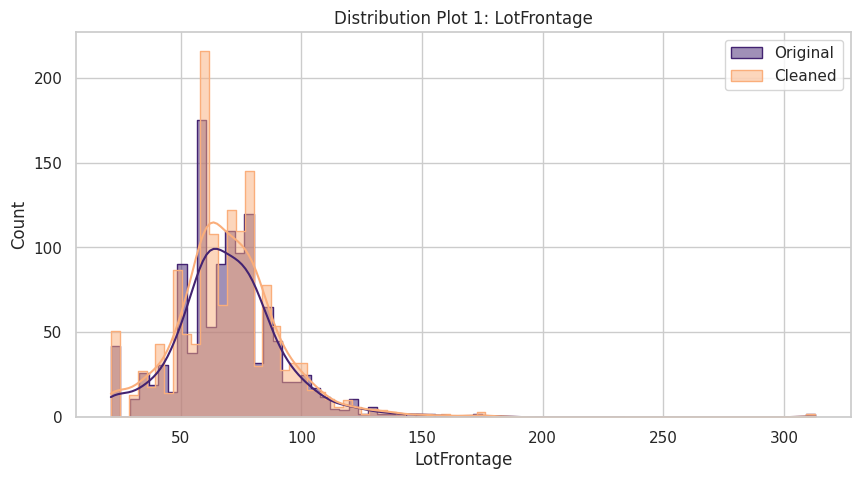

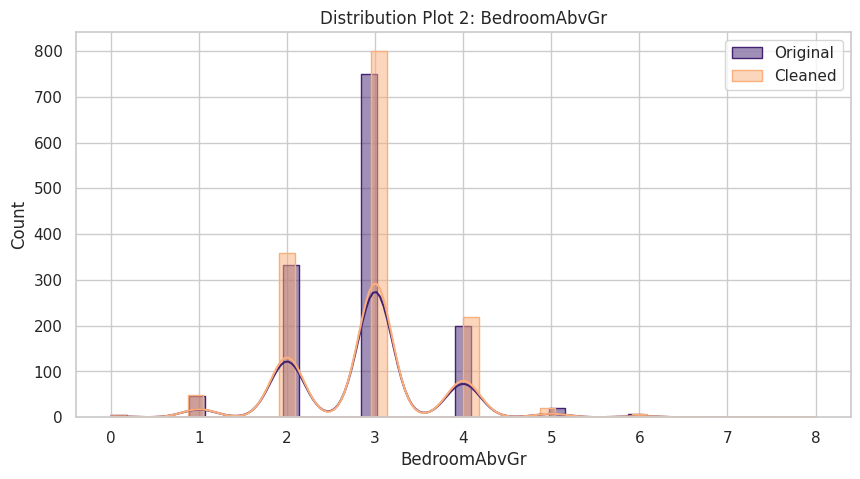

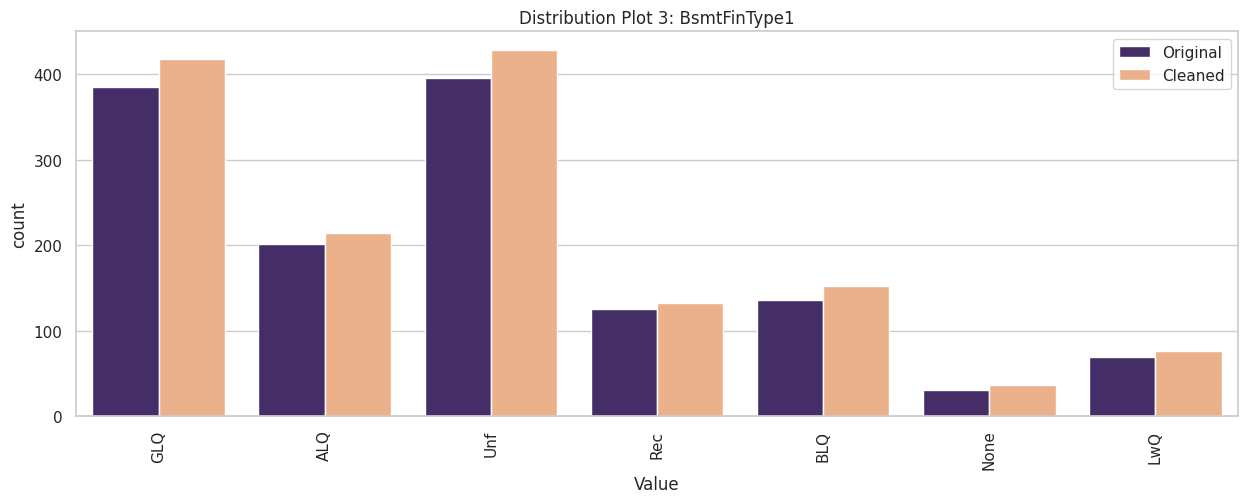

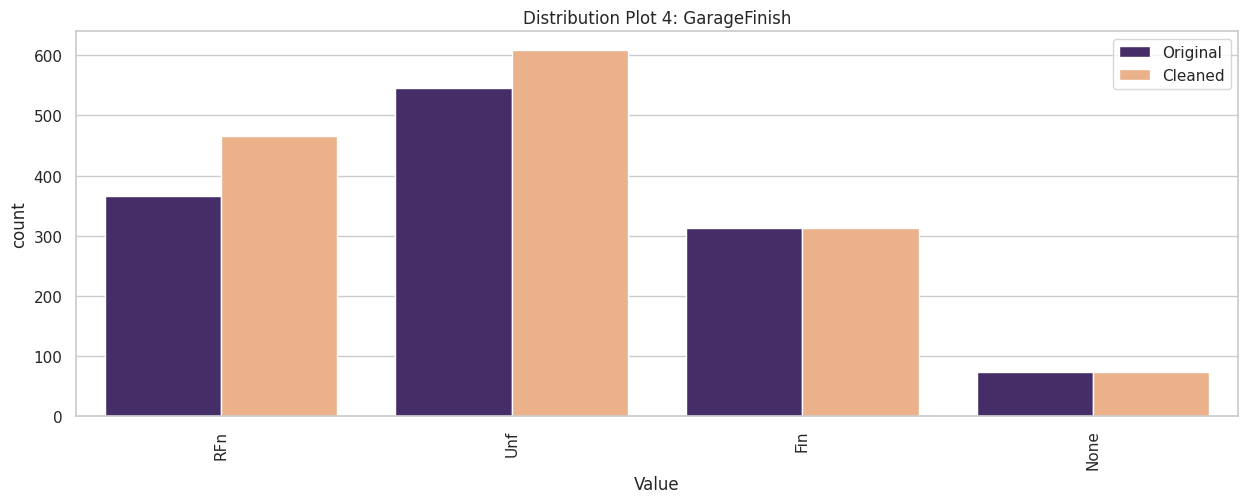

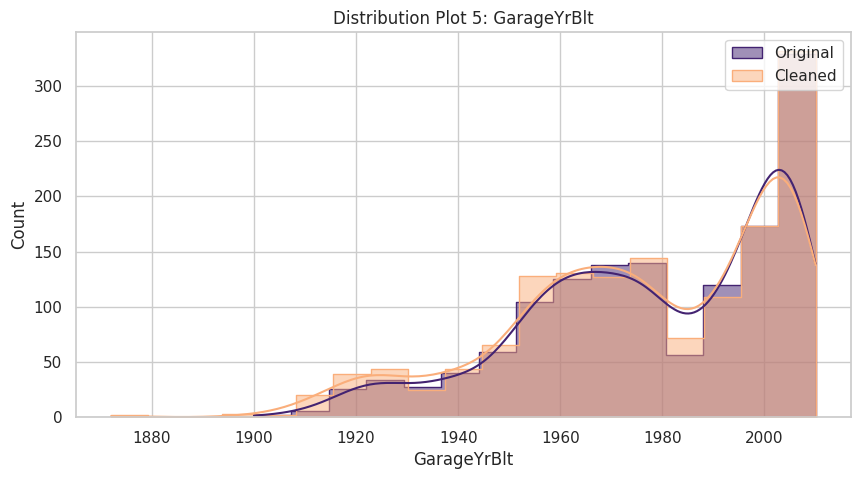

In [23]:
DataCleaningEffect(df_houseprices_original,
df_houseprices_cleaned,
variables_applied_with_method = df_houseprices_for_cleaning[['LotFrontage', 'BedroomAbvGr', 'BsmtFinType1', 'GarageFinish', 'GarageYrBlt']])

In [24]:
df_houseprices_cleaned.head()


1stFlrSF  BedroomAbvGr BsmtExposure BsmtFinType1 GarageFinish  GarageYrBlt  \
0       856             3           No          GLQ          RFn         2003   
1      1262             3           Gd          ALQ          RFn         1976   
2       920             3           Mn          GLQ          RFn         2001   
3       961             3           No          ALQ          Unf         1998   
4      1145             4           Av          GLQ          RFn         2000   

   GrLivArea KitchenQual  LotArea  LotFrontage  ...  OverallQual  TotalBsmtSF  \
0       1710          Gd     8450           65  ...            7          856   
1       1262          TA     9600           80  ...            6         1262   
2       1786          Gd    11250           68  ...            7          920   
3       1717          Gd     9550           60  ...            7          756   
4       2198          Gd    14260           84  ...            8         1145   

   YearBuilt  SalePrice  Has2ndFloor  HasMasVnr  HasOpenPorch  HasGarage  \
0       2003     208500            1          1             1          1   
1       1976     181500            0          0             0          1   
2       2001     223500            1          1             1          1   
3       1915     140000            0          0             1          1   
4       2000     250000            0          1             1          1   

   HasFinBsmt  ModsMade  
0           1         0  
1           1         0  
2           1         1  
3           1         1  
4           1         0  

[5 rows x 21 columns]

In [25]:
# Data Exploration of final dataset

from ydata_profiling import ProfileReport

# Generate the profile report using the modified DataFrame with missing data recoded, zeroes addressed, and categorical data turned into numerical
pandas_report = ProfileReport(df_houseprices_cleaned, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Save as new working dataset in Collections folder

In [26]:
# Save as file in collections folder

import os
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)


[Errno 17] File exists: 'outputs/datasets/cleaned'


In [27]:
df_houseprices_cleaned.to_csv("outputs/datasets/cleaned/HousePricesClean.csv", index=False)

---

# Conclusions and Next Steps